In [1]:
import pandas as pd
import json 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
with open('/Users/tramanhngocn/git/cs5344_project/Twibot-20/train.json', "r") as f:
    train_dict = json.load(f)

In [4]:
len(train_dict)

8278

In [7]:
print(f"number of valid accounts: {len([x for x in train_dict if x['label']=='0'])}")
print(f"number of bot accounts: {len([x for x in train_dict if x['label']=='1'])}")

number of valid accounts: 3632
number of bot accounts: 4646


# Viz 1: Word cloud for genuine and bot tweets

In [11]:
import re

def process_tweets(tweets):
    # tweets: list of string
    text = ' '.join([x.lower().strip().replace('\n', '') for x in tweets])
    text = re.sub(r'https?://\S+', 'https', text)
    return text
    
def transform_data_with_tweets(row):
    transformed = {}
    transformed['followers_count'] = int(row['profile']['followers_count'])
    transformed['friends_count'] = int(row['profile']['friends_count'])
    transformed['verified'] = 1 if row['profile']['verified'].strip()=='True' else 0
    transformed['statuses_count'] = int(row['profile']['statuses_count'])
    transformed['tweets_count'] = len(row['tweet']) if row['tweet'] else 0
    transformed['tweets'] = process_tweets(row['tweet']) if row['tweet'] else ''
    
    transformed['label'] = int(row['label'])
    
    return transformed
        

In [ ]:
# transform_data_with_tweets(train_dict[0])

In [ ]:
df_tfidf = pd.DataFrame([transform_data_with_tweets(row) for row in train_dict])

In [25]:
genuine_text = ' '.join(df_tfidf[df_tfidf['label']==0]['tweets'].values.astype('U'))
bot_text = ' '.join(df_tfidf[df_tfidf['label']==1]['tweets'].values.astype('U'))

In [21]:
# Import package
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

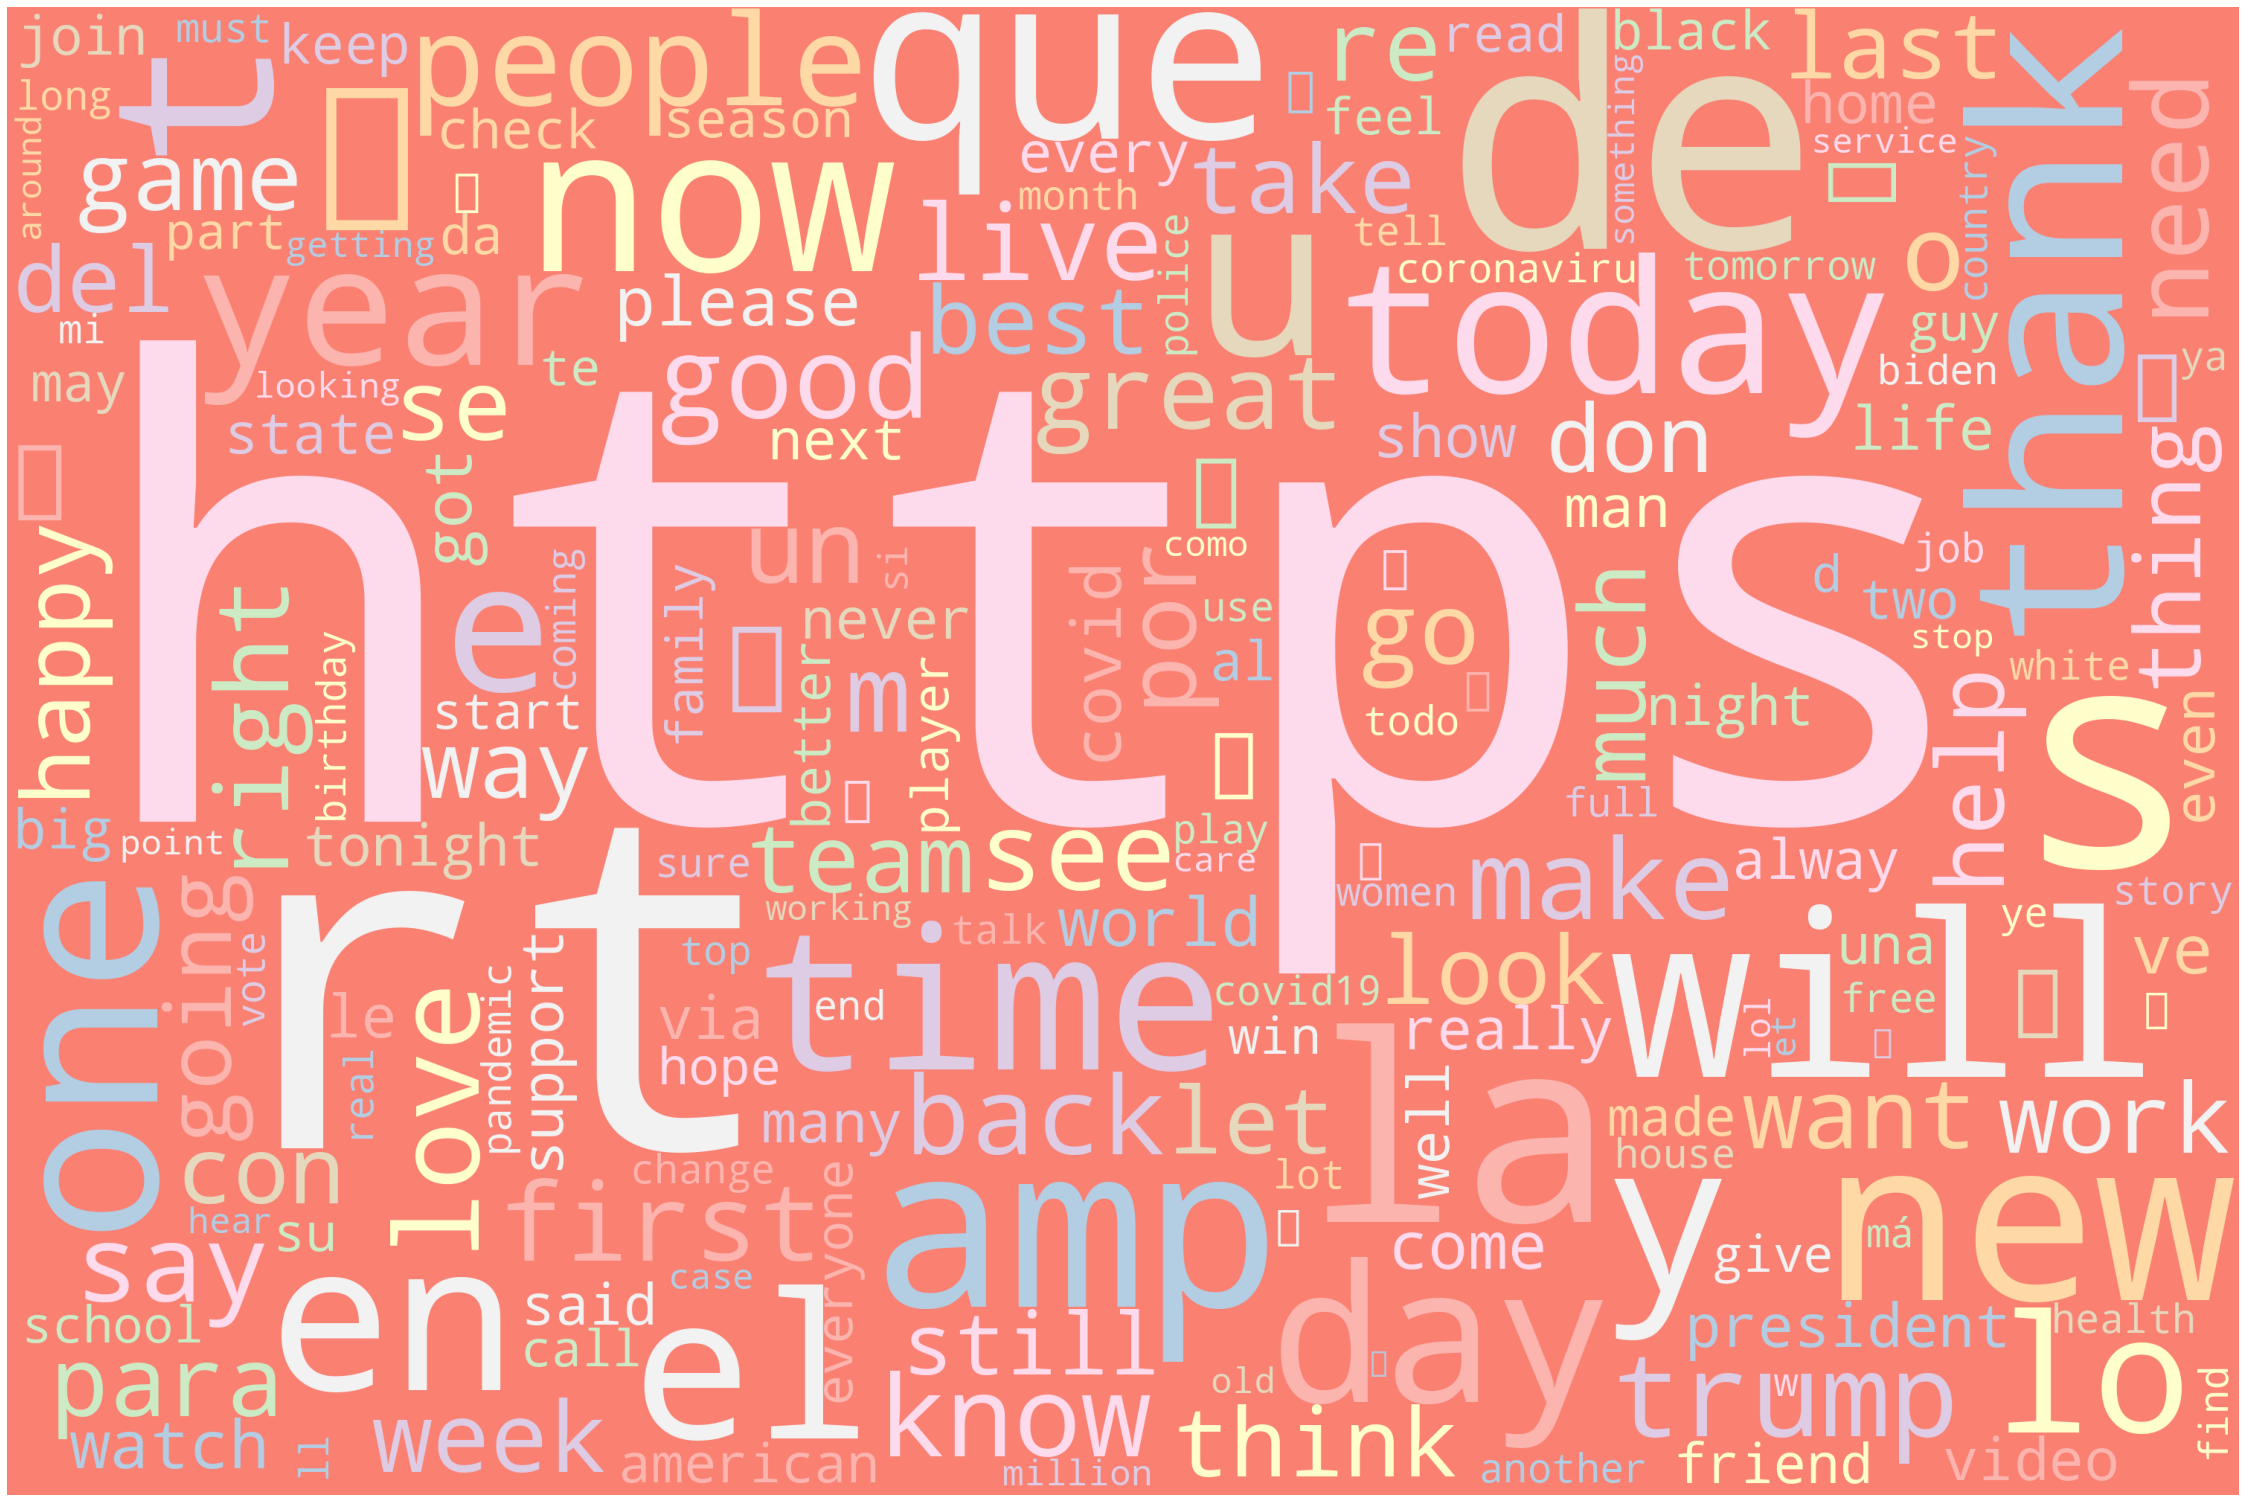

In [26]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud for genuine tweets
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(genuine_text)
# Plot
plot_cloud(wordcloud)

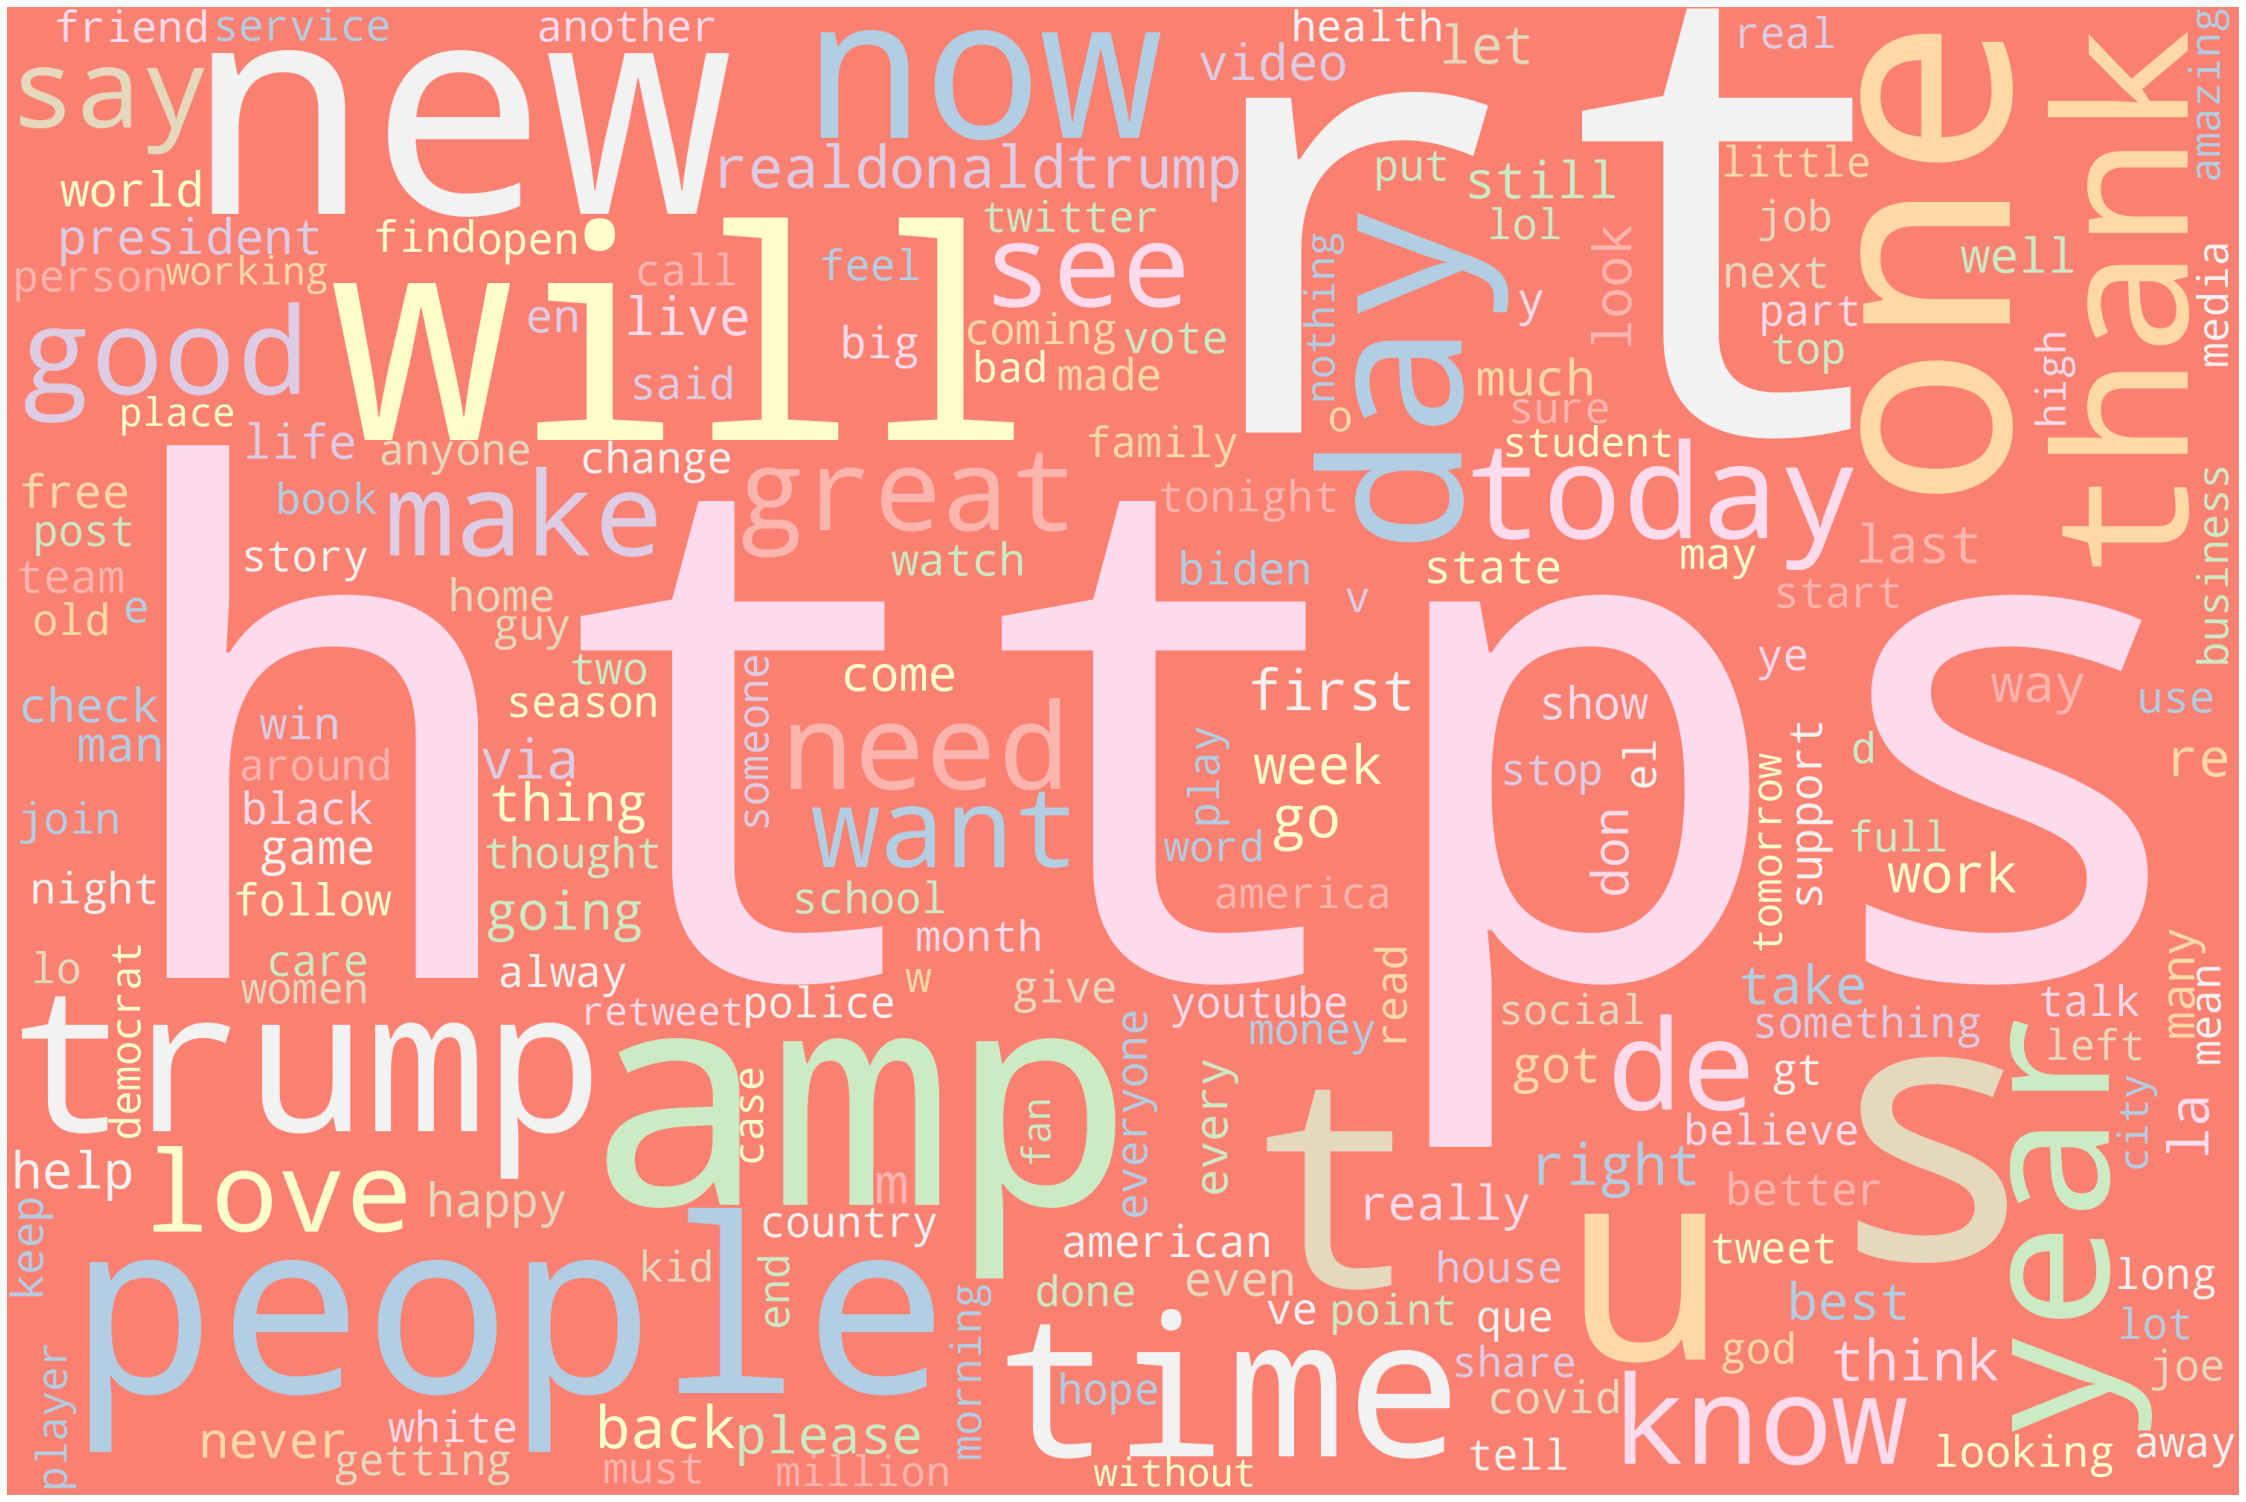

In [27]:
# Generate word cloud for bot tweets
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(bot_text)
# Plot
plot_cloud(wordcloud)

#  Viz 2: Follower distribution of genuine vs bot accounts

In [29]:
import seaborn as sns

Text(0.5, 1.0, 'Follower distribution for genuine accounts')

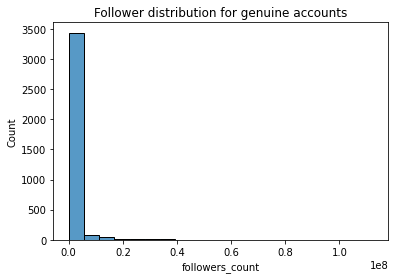

In [45]:
sns.histplot(data=df_tfidf[df_tfidf['label']==0], x='followers_count', bins=20).set_title('Follower distribution for genuine accounts')

Text(0.5, 1.0, 'Follower distribution for bot accounts')

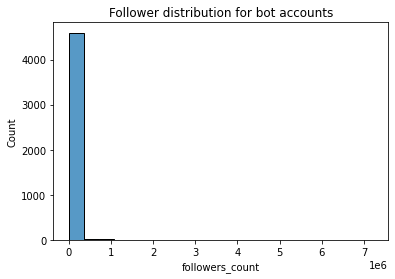

In [44]:
sns.histplot(data=df_tfidf[df_tfidf['label']==1], x='followers_count', bins=20).set_title('Follower distribution for bot accounts')

# Viz 3: Follower/following ratio in pie chart

In [61]:
def plot_pie_chart(df, title):
    #define data
    data = [df['followers_count'].sum(), df['friends_count'].sum()]
    labels = ['Followers count', 'Followees count']

    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:2]

    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title(title)
    plt.show()

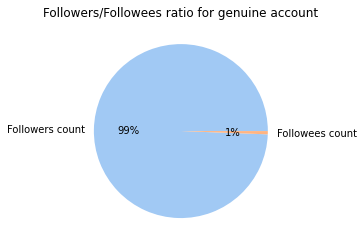

In [62]:
plot_pie_chart(df_tfidf[df_tfidf['label']==0], title='Followers/Followees ratio for genuine account')

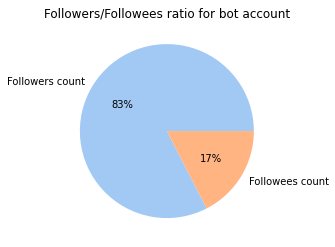

In [63]:
plot_pie_chart(df_tfidf[df_tfidf['label']==1], title='Followers/Followees ratio for bot account')